## Student: Deng, Zixuan (V00971633)
# Problem 9

## Guessing the source [20 points]

Given a set of points from Github (https://gist.github.com/inumanag/ebb1566746aba800899e
406f03c799c1), use linear regression to fit a line. What is the result? If the fit is not perfect, what
is the best feature transformation to get a perfect fit? Prove it with a nice plot!

In [ ]:
import pandas as pd
import numpy as np
import random
np.random.seed(1337)
random.seed(1337)

# Plotting support
from matplotlib import pyplot as plt
from plotnine import *
# Standard libraries
import pandas as pd
import sklearn as sk

In [ ]:
df= pd.read_csv('https://gist.githubusercontent.com/inumanag/ebb1566746aba800899e406f03c799c1/raw/fa5bf7ba619d0f1a71cdac0406d22fc59400526b/prob9-data.txt', header=None)
df.head()
df['Row Number'] = np.arange(1, df.shape[0] + 1)
df = df.rename(columns={0:'y', "Row Number":"Row Number"})

In [ ]:
print(df.index)

RangeIndex(start=0, stop=1000, step=1)


In [ ]:
df.head()

,y,Row Number
0,0.000000,1
1,0.095401,2
2,0.182488,3
3,0.262595,4
4,0.336758,5


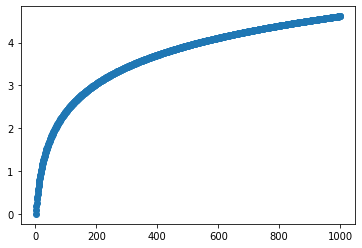

In [ ]:
plt.scatter(df.iloc[:,1], df.iloc[:,0])
plt.show()

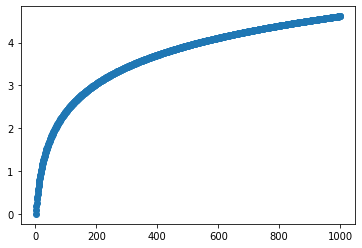

In [ ]:
plt.scatter(df['Row Number'],df['y'])

In [ ]:
X = df['Row Number']
y = df['y']

In [ ]:
X

0         1
1         2
2         3
3         4
4         5
       ... 
995     996
996     997
997     998
998     999
999    1000
Name: Row Number, Length: 1000, dtype: int64

In [ ]:
y

0      0.000000
1      0.095401
2      0.182488
3      0.262595
4      0.336758
         ...   
995    4.611148
996    4.612143
997    4.613136
998    4.614129
999    4.615121
Name: y, Length: 1000, dtype: float64

In [ ]:
X = X.values.reshape(-1,1)
X

array([[   1],
       [   2],
       [   3],
       [   4],
       [   5],
       [   6],
       [   7],
       [   8],
       [   9],
       [  10],
       [  11],
       [  12],
       [  13],
       [  14],
       [  15],
       [  16],
       [  17],
       [  18],
       [  19],
       [  20],
       [  21],
       [  22],
       [  23],
       [  24],
       [  25],
       [  26],
       [  27],
       [  28],
       [  29],
       [  30],
       [  31],
       [  32],
       [  33],
       [  34],
       [  35],
       [  36],
       [  37],
       [  38],
       [  39],
       [  40],
       [  41],
       [  42],
       [  43],
       [  44],
       [  45],
       [  46],
       [  47],
       [  48],
       [  49],
       [  50],
       [  51],
       [  52],
       [  53],
       [  54],
       [  55],
       [  56],
       [  57],
       [  58],
       [  59],
       [  60],
       [  61],
       [  62],
       [  63],
       [  64],
       [  65],
       [  66],
       [  

In [ ]:
y = y.values.reshape(-1,1)

In [ ]:
y

array([[0.        ],
       [0.09540118],
       [0.18248838],
       [0.26259524],
       [0.3367582 ],
       [0.40579872],
       [0.47037893],
       [0.53104034],
       [0.58823146],
       [0.64232793],
       [0.69364756],
       [0.74246154],
       [0.78900321],
       [0.83347475],
       [0.87605248],
       [0.91689115],
       [0.95612726],
       [0.99388183],
       [1.03026271],
       [1.06536635],
       [1.0992794 ],
       [1.13207998],
       [1.16383876],
       [1.19461989],
       [1.22448177],
       [1.25347771],
       [1.28165653],
       [1.30906301],
       [1.33573837],
       [1.36172061],
       [1.38704483],
       [1.41174354],
       [1.4358469 ],
       [1.45938294],
       [1.48237774],
       [1.50485565],
       [1.52683939],
       [1.54835022],
       [1.56940806],
       [1.5900316 ],
       [1.61023839],
       [1.63004494],
       [1.6494668 ],
       [1.66851862],
       [1.68721425],
       [1.70556676],
       [1.72358851],
       [1.741

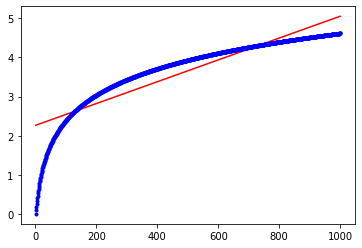

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_
new_y_predict = lin_reg.predict(X)
plt.plot(X, new_y_predict, "r-")
plt.plot(X, y, "b.")
plt.show()

We need to do some transformation. 

Reference: 

https://mathworld.wolfram.com/LeastSquaresFittingLogarithmic.html

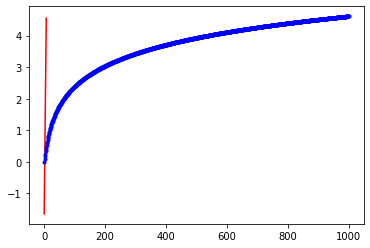

In [ ]:
lin_reg_new = LinearRegression()
lin_reg_new.fit(np.log(X), y)
lin_reg_new.intercept_, lin_reg_new.coef_
y_predict1 = lin_reg_new.predict(np.log(X))
plt.plot(np.log(X), y_predict1, "r-")
plt.plot(X, y, "b.")
plt.show()

In [ ]:
np.polyfit(np.log(df.iloc[:,1]), df.iloc[:,0], 1)

array([ 0.89827259, -1.65079294])

In [ ]:
new_y = np.log(df.iloc[:,1]) * 0.89827259 - 1.65079294

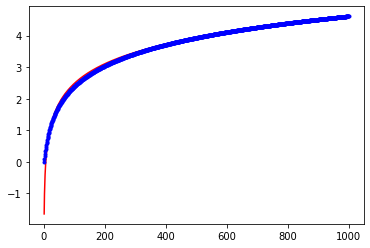

In [ ]:
plt.plot(df.iloc[:,1], new_y, "r-")
plt.plot(df.iloc[:,1], df.iloc[:,0], "b.")
plt.show()

$$ 0.89827259 log(x) - 1.65079294 $$

From the graph, I think simple linear regression does fit the data well because the shape of the line is not linear. After apply log transformation or least squres fitting logarithmic, the new line will fit the data points. 